<h1>¿Qué es un módulo?</h1>

 Python has a way to put definitions in a file and use them in a script or in an interactive instance of the interpreter. Such a file is called a module; definitions from a module can be imported into other modules or into the main module (the collection of variables that you have access to in a script executed at the top level and in calculator mode).

A module is a file containing Python definitions and statements. The file name is the module name with the suffix .py appended. Within a module, the module’s name (as a string) is available as the value of the global variable __name__. For instance, use your favorite text editor to create a file called fibo.py in the current directory with the following contents:

In [ ]:
def fib(n):    # write Fibonacci series up to n
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()

def fib2(n):   # return Fibonacci series up to n
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result

Now enter the Python interpreter and import this module with the following command:


In [ ]:
import fibo


This does not add the names of the functions defined in fibo directly to the current namespace (see Python Scopes and Namespaces for more details); it only adds the module name fibo there. Using the module name you can access the functions:

In [ ]:
fibo.fib(1000)
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987
fibo.fib2(100)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
fibo.__name__
'fibo'

<h2>Diferencias con Js</h2>

Syntax and Usage:

Python: Python uses the import statement to include modules. For example: import math. Modules in Python are typically separate .py files that contain functions, classes, and variables that can be used in other parts of the program.

JavaScript: In JavaScript, you use import and export statements to work with modules. Modules can be created using .js files, and you can export functions, classes, or variables using the export keyword. To import a module, you use the import statement. For example: import { myFunction } from './myModule.js';.

File Structure:

Python: Python's module system often uses standalone .py files for each module. The file name is the module name.

JavaScript: JavaScript modules also use separate .js files. The module name and file name are not necessarily the same. In JavaScript, you can specify a different name for an imported module using the as keyword.

Execution Context:

Python: In Python, when a module is imported, it's executed only once, and its contents are cached. Subsequent imports of the same module reuse the cached version. This is done to avoid redundancy and improve performance.

JavaScript: In JavaScript, modules are executed in their own isolated scope, and their contents are evaluated when imported. Each import creates a new instance of the module, meaning the module's code is executed every time it's imported.

Browser vs. Server-Side:

Python: Python is commonly used for server-side programming, and its modules are used to organize code on the server. Modules can also be used for various other purposes.

JavaScript: JavaScript is often used for client-side scripting in web browsers. Modules help organize and structure the code for web applications. With Node.js, JavaScript is also used for server-side development.

Common Module Formats:

Python: Python modules are typically written in plain Python code. Some common external packages can also be used, like those from the Python Package Index (PyPI).

JavaScript: In JavaScript, modules can be written in native ECMAScript, but there are also module formats like CommonJS (used in Node.js), ES6 Modules (browser-based), and AMD (Asynchronous Module Definition) used in some older JavaScript libraries.

Dynamic vs. Static:

Python: Python's module system is relatively static. Once a module is imported, its content is available throughout the program's execution.

JavaScript: JavaScript's module system is more dynamic. Modules can be asynchronously loaded and imported, making it more versatile in web applications.

<h3>Ejemplo de importación y cache</h3>

<p>Acá vemos que al importar sólo con "import [modulo]" se crea un "caché" y si se sobreescribe una variable, se transforma no importa cuántas veces se importe nuevamente</p>

In [ ]:
# mod2

color = 1
print('hola desde mod2')

In [ ]:
# main

import mod2

print(mod2.color)
mod2.color = "verde"
import mod2
print(mod2.color)

import mod2
print(mod2.color)

""" 1
verde
verde """

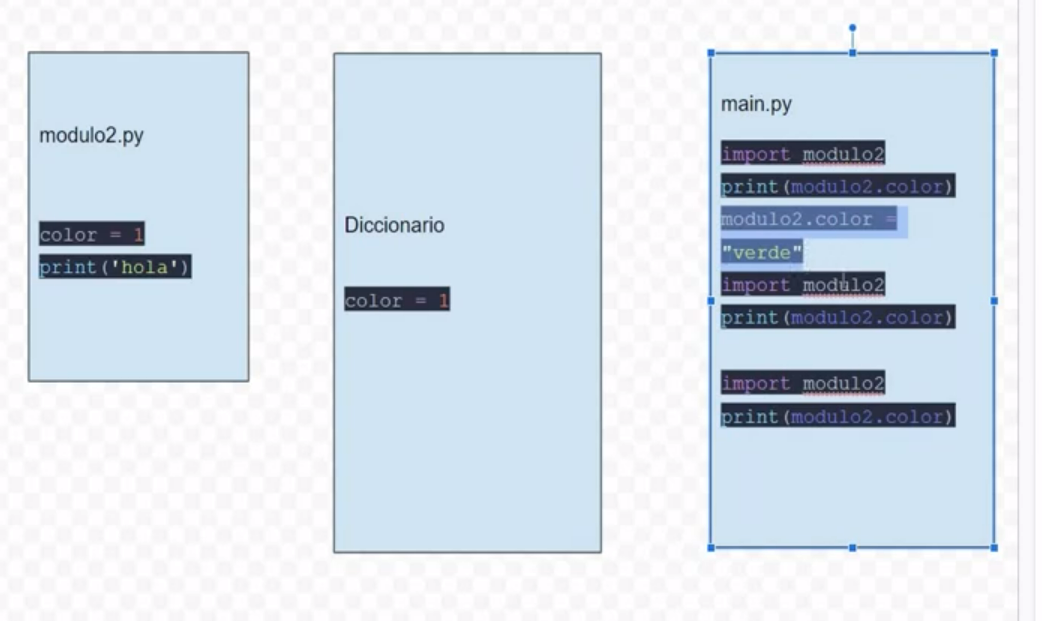

<h3>from ... import ...</h3>

<p>En este caso es diferente porque se está llamando al archivo raíz cada vez que se importa. Las arrays son mutables asi que se cambia el valor, pero las variables como la x, no lo son así que se crea otra</p>

<p>Mutable objects are those that allow you to change their value or data in place without affecting the object's identity. In contrast, immutable objects don't allow this kind of operation. You'll just have the option of creating new objects of the same type with different values.</p>

In [ ]:
#mod3.py

x = 1

y = [1, 2]

In [ ]:
# main.py

from mod3 import x, y

# here I'm changing an immutable variable
x = 42
y[0] = 84
print(x)
print(y[0])
print(y)

# here I'm changing a mutable variable
y[0] = 30
print(y[0])
from mod3 import x, y

print(x)
print(y[0])
print(y)

"""
42
84
[84, 2]
30
1
30
[30, 2]
"""

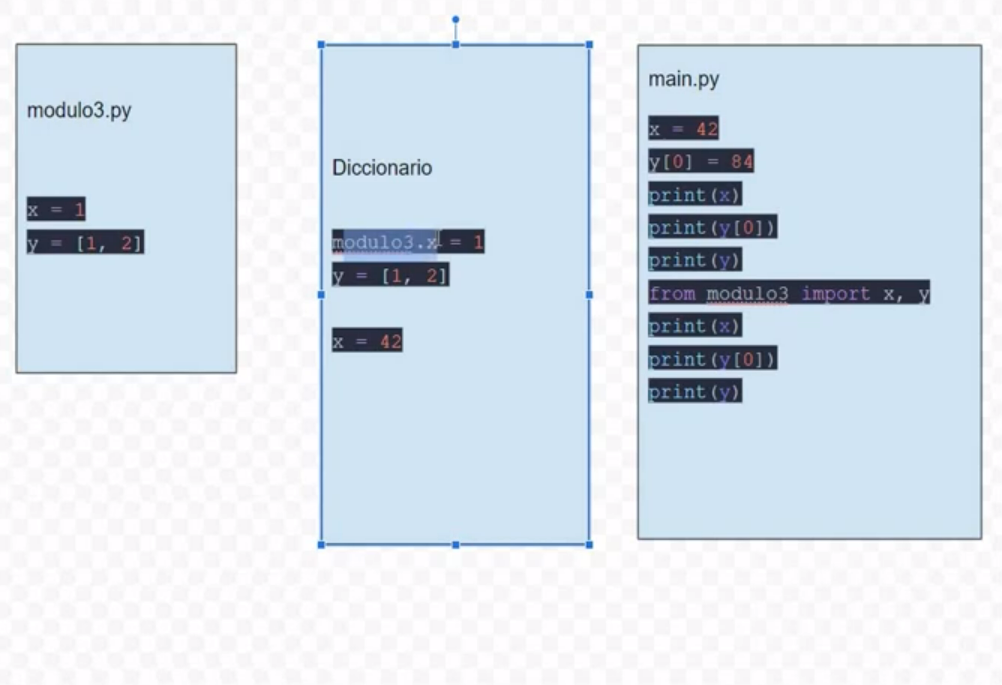

<h3>Resumen:</h3>

In [ ]:
# mod4

x =1 

In [ ]:
# main

import mod4

print("== import ==")
print(f"imported variable directaly from mod4 BEFORE modifying it - mod4.x = {mod4.x}\n")
mod4.x = 2
print(f"modified mod4.x - it creates the cache variable - mod4.x = {mod4.x}\n")

mod4.x = 3

print(f"modified mod4.x again = {mod4.x}\n")

import mod4

print(f"-- import mod4 again --\n")
print(f"mod4.x = {mod4.x}\n")



# changing the import mode

from mod4 import x
print("== from... import ==")

x = 4

print(f"modified x = {x} \n")

from mod4 import x

print(f"x imported again x = {x}\n")

"""
== import ==
imported variable directaly from mod4 BEFORE modifying it - mod4.x = 1

modified mod4.x - it creates the cache variable - mod4.x = 2

modified mod4.x again = 3

-- import mod4 again --

mod4.x = 3

== from... import ==
modified x = 4

x imported again x = 3

"""

<p>Como conclusión podemos decir:</p>

<ul>
    <ul>Import
        <li>Cada vez que es "import" al modificar mod.x se pisa la variable anterior y aunque se importe nuevamente sigue siendo del mismo valor que se modificó </li>
        <li>si modificas el mod.x modificarás todas sus importaciones posteriores, no importando el tipo de importación</li>
    </ul><br>
    <ul>From [module] import [variables] 
        <li>Se puede modificar x pero no se modifica la raíz. Sólo se usa el valor temporal</li>
        <li>Por lo tanto, si se importa nuevamente usando este método, x tendrá el valor antes de haber sido modificada o importada al principio</li>
    </ul>
</ul>

<h4>Otro ejemplo</h4>

In [ ]:
# mod6

x = 88
y = 88

def f():
    global x
    x = 99

def g(z):
    global y
    y = y + z
    return y



In [ ]:
# main

x = 11
y = 11

import mod6

mod6.f()
print(x, mod6.x)
mod6.g(1)
print(y, mod6.y) 


"""
11 99
11 89

"""


<h3>__init__ como archivo para permitir hacer rutas entre módulos</h3>

<p>
__init__.py File:

In Python, a directory that contains a file named __init__.py is treated as a package. This file can be empty or contain package-level initialization code.

The presence of an __init__.py file in a directory allows you to import modules from that directory. For example, if you have a package named my_package and it contains a module named my_module, you can import it as follows:
    
</p>

In [ ]:
from my_package import my_module

<p>Es necesario poner un archivo __init__.py en cada directorio al que se quiera acceder</p>

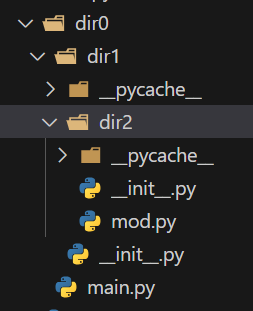

In [ ]:
# dir1 / __init__.py

print("dir2 init")

y = 2

In [ ]:
# dir1.dir2 / __init__.py

print("dir2 init")

y = 2


In [ ]:
# dir1.dir2.mod

print("mod")
z = 3

In [ ]:
# main.py

import dir1.dir2.mod

print(dir1.x)
print(dir1.dir2.y)
print(dir1.dir2.mod.z)

"""
1
2
3
"""

<h1>Variables privadas __all__ </h1>

<p>What is __all__ in Python?
A list of strings that define what variables have to be imported to another file is known as __all__ in Python. The variables which are declared in that list can only be used in another file after importing this file, the rest variables if called will throw an error.</p>

In [ ]:
# all_variables

__all__ = ['variable_a_compartir1', 'funcion_a_compartir']

variable_privada1 = 'hola variable privada 1'
variable_a_compartir1 = "hola variable pública 1"
def funcion_a_compartir():
    return 'public function 1'

print('i ------------------')
print(variable_privada1)
print(variable_a_compartir1)
print(funcion_a_compartir())
print("f ------------------- ")

In [ ]:
# calling variables inside all_variables

from privadoall import *

# # if it is not declared inside __all__, we can call it explicitly
# from privadoall import variable_privada1

print(variable_a_compartir1)
print(funcion_a_compartir())
print(variable_privada1)

In [ ]:
# if it is not declared inside __all__, we can call it explicitly
from privadoall import variable_privada1

print(variable_privada1)

In [ ]:
# calling explicitly

import privadoall

print(privadoall.variable_privada1)